In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import make_moons, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

## Make moons, class=2

In [2]:
X, y = make_moons(n_samples=400, noise=0.1)
moons = pd.DataFrame(X, columns=[0,1])
moons['target'] = y

## Make circles, class=2

In [3]:
X, y = make_circles(400, factor=0.1, noise=0.1)
circles = pd.DataFrame(X, columns=[0,1])
circles['target'] = y

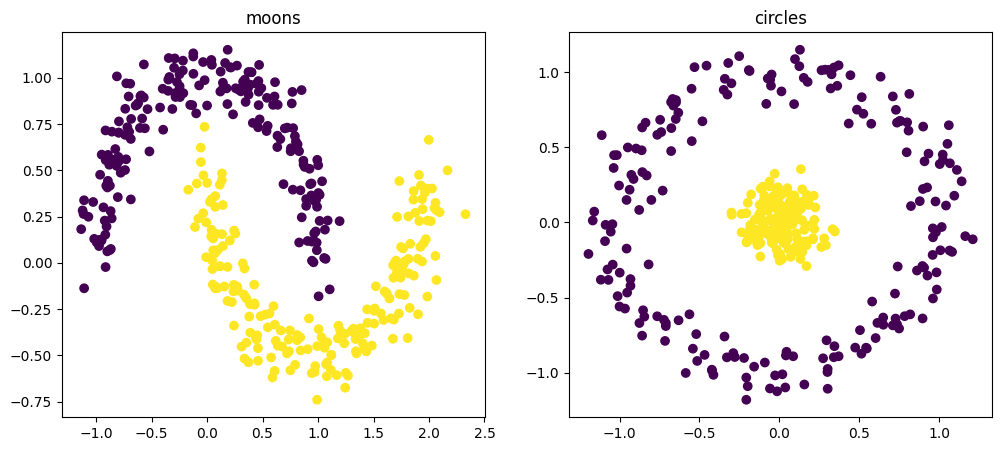

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].set_title("moons")
axes[0].scatter(moons[0], moons[1], c=moons['target'])

axes[1].set_title("circles")
axes[1].scatter(circles[0], circles[1], c=circles['target'])

## Logistic Regression

0.9825

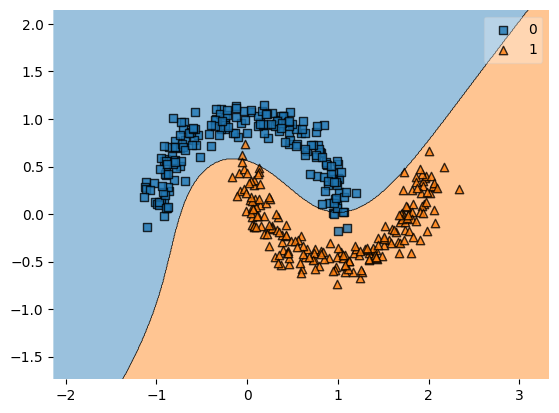

In [20]:
lr = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("lr", LogisticRegression())
])

lr.fit(
    moons.iloc[:,0:2],
    moons.iloc[:,-1]
)

plot_decision_regions(moons.iloc[:,0:2].values, moons.iloc[:,-1].values, lr)
accuracy_score(moons.iloc[:, -1], lr.predict(moons.iloc[:, 0:2]))

1.0

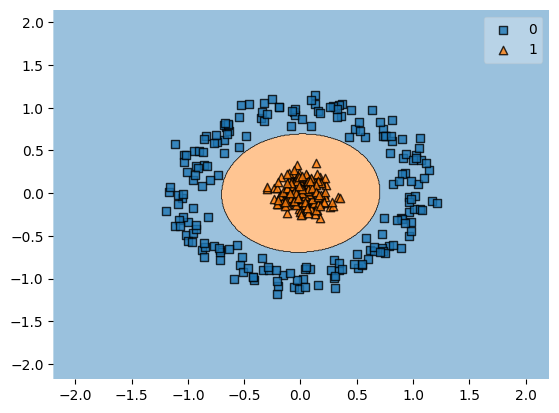

In [19]:
lr = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lr", LogisticRegression())
])

lr.fit(
    circles.iloc[:,0:2],
    circles.iloc[:,-1]
)
plot_decision_regions(circles.iloc[:,0:2].values, circles.iloc[:,-1].values, lr)
accuracy_score(circles.iloc[:, -1], lr.predict(circles.iloc[:, 0:2]))

## SVM

In [9]:
# {'sigmoid', 'rbf', 'linear', 'precomputed', 'poly'}

0.995

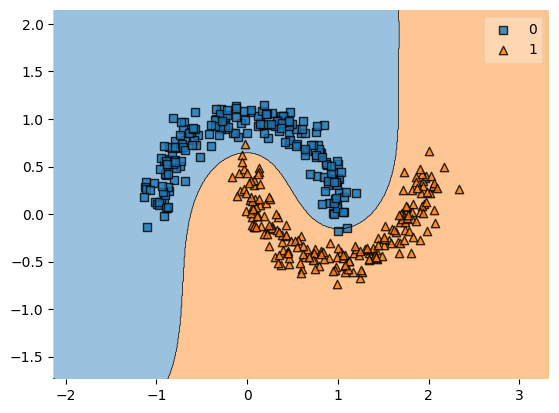

In [16]:
svm = SVC(kernel='rbf')
svm.fit(moons.iloc[:,0:2].values, moons.iloc[:,-1].values)
plot_decision_regions(moons.iloc[:,0:2].values, moons.iloc[:,-1].values, svm)
accuracy_score(moons.iloc[:, -1], svm.predict(moons.iloc[:, 0:2]))

1.0

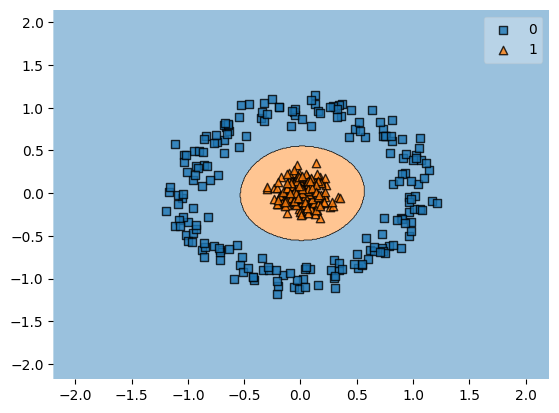

In [18]:
svm = SVC(kernel='rbf')
svm.fit(circles.iloc[:,0:2].values, circles.iloc[:,-1].values)
plot_decision_regions(circles.iloc[:,0:2].values, circles.iloc[:,-1].values, svm)
accuracy_score(circles.iloc[:, -1], svm.predict(circles.iloc[:, 0:2]))